# 1: Installing finesse.virgo:

`finesse.virgo` is not automatically installed with finesse, to install it do the following
(from bash/windows-powershell assuming you have git and pip installed and you are in the desired installation folder):
* `conda activate name_of_finesse_environment`
* `git clone https://git.ligo.org/finesse/finesse-virgo.git`
* `pip install -e finesse-virgo`


For additional instructions, visit: 
https://gitlab.com/ifosim/finesse/finesse-virgo

In [1]:
# Then you can import it with: 
import finesse
import finesse.virgo

# 2 Instantiating the virgo class:

In [2]:
virgo = finesse.virgo.Virgo(verbose=True)

Parsing common katfile...
Parsing additional katscript...
Adding locks for ['PRCL_lock', 'MICH_lock', 'CARM_lock', 'DARM_lock', 'SRCL_lock'].


Other options for non-standard configurations can be activated with optional arguments to `.Virgo()` , 

e.g. 
`virgo = finesse.virgo.Virgo(verbose=True, use_3f_error_signals=True)`

To print the list of optional arguments, just execute 

`finesse.virgo.Virgo?`

# 3: The virgo katscriptS:

The Virgo() class reads **two different katscripts**, they are located in 

`/your_installation_directory/finesse-virgo/src/finesse_virgo/katscript`

* `00_virgo_common_file.kat` Contains the main interferometer objects and parameters (that ismostly everything that was contained in the finesse2 virgo katfile, mirrors, modulators, laser etc...)
* `01_additional_katscript.kat` Contains instead definitions useful for working with the virgo setup e.g. the DOFs, useful frequencies, default detectors, et...)

## A snippet from the additional katscript:


```
# Useful lengths
###########################################################################
var lpr (lPR_POP.L + sPOPsub.L * sPOPsub.nr + lPOP_BS.L)
var lsrbs (lsr.L + sBSsub2.L * sBSsub2.nr)
var ln (sBSsub1.L * sBSsub1.nr + lBS_CPN.L + sCPNsub.L * sCPNsub.nr + sCPN_NI.L + sNIsub.L * sNIsub.nr)
var lw (                           lBS_CPW.L + sCPWsub.L * sCPWsub.nr + sCPW_WI.L + sWIsub.L * sWIsub.nr)
var lMI (0.5 * (ln + lw))
var lPRC (lpr + lMI)
var lSRC (lsrbs + lMI)
var lSchnupp (ln - lw)

# Useful frequencies
###########################################################################
var fsrN (0.5 * c0 / LN.L)
var fsrW (0.5 * c0 / LW.L)
var fsrPRC (0.5 * c0 / lPRC)
var fsrSRC (0.5 * c0 / lSRC)
var f1_arm (125.5 * fsrN - 300.0)  # Definition of f1, TDR section 2.3
var f1_SRC (3.5 * fsrN)
var f1_PRC (3.5 * fsrN)

# DOFs
###########################################################################
# position
dof DARM NE.dofs.z -1 WE.dofs.z +1
dof CARM NE.dofs.z +1 WE.dofs.z +1
dof MICH NI.dofs.z -1 NE.dofs.z -1 WI.dofs.z +1 WE.dofs.z +1
dof PRCL PR.dofs.z +1
dof SRCL SR.dofs.z -1

dof NARM NI.dofs.z +1 NE.dofs.z +1
dof WARM WI.dofs.z +1 WE.dofs.z +1

dof NI_z NI.dofs.z +1
dof NE_z NE.dofs.z +1
dof WI_z WI.dofs.z +1
dof WE_z WE.dofs.z +1

# applied force
dof DARM_Fz NE.dofs.F_z -1 WE.dofs.F_z +1
dof CARM_Fz NE.dofs.F_z +1 WE.dofs.F_z +1
dof MICH_Fz NI.dofs.F_z -1 NE.dofs.F_z -1 WI.dofs.F_z +1 WE.dofs.F_z +1
dof PRCL_Fz PR.dofs.F_z +1
dof SRCL_Fz SR.dofs.F_z -1

dof NARM_Fz NI.dofs.F_z +1 NE.dofs.F_z +1
dof WARM_Fz WI.dofs.F_z +1 WE.dofs.F_z +1

dof NI_Fz NI.dofs.F_z +1
dof NE_Fz NE.dofs.F_z +1
dof WI_Fz WI.dofs.F_z +1
dof WE_Fz WE.dofs.F_z +1
```

In [3]:
# You can directly read/edit those files with your preferred text editor, or you can ask finesse to print the resulting model (but the printing function skips operations and commands for now):
print(virgo.model.unparse())


regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for nonsingular commands not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet


#--------------------------------------------------------------------------
# An Advanced Virgo Plus input file for Finesse 3

# modulation frequencies [TDR, tab 2.3, pp 24]
var f6 6270777   # 6 MHz,  fmod1 in TDR
var f8 (1.3333333333333333*f6)   # 8 MHz,  4 / 3 * f6, fmod3 in TDR
var f56 (9*f6)     # 56 MHz, 9 * f6, fmod2 in TDR

var nsilica 1.44963
var Mloss 30u

var etalonNI 0  # NI etalon tuning
var etalonWI 0  # WI etalon tuning

# Laser and modulators
###########################################################################
# EOM parameters from https://logbook.virgo-gw.eu/virgo/?r=34898
# and https://logbook.virgo-gw.eu/virgo/?r=38123
# and https://logbook.virgo-gw.eu/virgo/?r=41551
laser i1 P=40.0
s s0 i1.p1 eom6.p1 L=1m
mod eom6 f=f6 midx=0.22
s sEOM6 eom6.p2 eom8.p1 L=0.1
mod eom8 f=f8 midx=0.15
s sEOM8 eom8.p2 eom56.p1 L=0.1
mod eom56 f=f56 midx=0.25

# REFL, B2 readout
###########################################################################
s s1 eom56.p2 FI.p1 L=0.2
# 

In [4]:
# The Info method summarizes many useful parameters of the loaded model
print(virgo.model.info())


1 optical mode

    - [0 0]

77 components

    - Laser('i1', signals_only=False, f=0.0, phase=0.0, P=40.0)
    - Modulator('eom6', positive_only=False, mod_type=ModulatorType.pm, order=1, phase=0.0, midx=0.22, f=f6.value)
    - Modulator('eom8', positive_only=False, mod_type=ModulatorType.pm, order=1, phase=0.0, midx=0.15, f=f8.value)
    - Modulator('eom56', positive_only=False, mod_type=ModulatorType.pm, order=1, phase=0.0, midx=0.25, f=f56.value)
    - DirectionalBeamsplitter('FI')
    - Beamsplitter('B2_attenuator', ybeta=0.0, xbeta=0.0, Rcy=inf, Rcx=inf, alpha=0.0, phi=0.0, L=0.0, T=0.00184, R=0.99816)
    - Mirror('PRAR', misaligned=False, ybeta=0.0, xbeta=0.0, Rcy=-3.62, Rcx=-3.62, phi=0.0, L=0.00016, T=0.99984, R=0.0)
    - Mirror('PR', misaligned=False, ybeta=0.0, xbeta=0.0, Rcy=-1430.0, Rcx=-1430.0, phi=0.0, L=3e-05, T=0.04835, R=0.95162)
    - Beamsplitter('POP_AR', ybeta=0.0, xbeta=0.0, Rcy=inf, Rcx=inf, alpha=6.0, phi=0.0, L=0.000125, T=0.999875, R=0.0)
    - Beamsplitte

### You can access the single component information like this:


In [5]:
print(virgo.model.SR.info())

Mirror SR

Parameters:
┌─────────────────────────────────────────────────────────┬─────────────┐
│ Description                                             │ Value       │
╞═════════════════════════════════════════════════════════╪═════════════╡
│ Reflectivity                                            │ 0.59997     │
├─────────────────────────────────────────────────────────┼─────────────┤
│ Transmission                                            │ 0.4         │
├─────────────────────────────────────────────────────────┼─────────────┤
│ Loss                                                    │ 3e-05       │
├─────────────────────────────────────────────────────────┼─────────────┤
│ Microscopic tuning (360 degrees = 1 default wavelength) │ 0.0 degrees │
├─────────────────────────────────────────────────────────┼─────────────┤
│ Radius of curvature (x)                                 │ 1430.0 m    │
├─────────────────────────────────────────────────────────┼─────────────┤
│ Radius of cur

In [6]:
# And edit them like this
virgo.model.SR.Rc = (1442, 1450) # x and then y RoCs
virgo.model.SR.xbeta = 1e-6

In [7]:
# The .info should now show the new parameters
print(virgo.model.SR.info()) # Yaw misalignment

Mirror SR

Parameters:
┌─────────────────────────────────────────────────────────┬───────────────┐
│ Description                                             │ Value         │
╞═════════════════════════════════════════════════════════╪═══════════════╡
│ Reflectivity                                            │ 0.59997       │
├─────────────────────────────────────────────────────────┼───────────────┤
│ Transmission                                            │ 0.4           │
├─────────────────────────────────────────────────────────┼───────────────┤
│ Loss                                                    │ 3e-05         │
├─────────────────────────────────────────────────────────┼───────────────┤
│ Microscopic tuning (360 degrees = 1 default wavelength) │ 0.0 degrees   │
├─────────────────────────────────────────────────────────┼───────────────┤
│ Radius of curvature (x)                                 │ 1442.0 m      │
├─────────────────────────────────────────────────────────┼──────

In [8]:
# Can also directly work with DOFs
virgo.model.CARM.DC = 10 # In degrees
print(virgo.model.CARM.info())


DegreeOfFreedom CARM

Parameters:
┌───────────────────────────────┬───────┐
│ Description                   │ Value │
╞═══════════════════════════════╪═══════╡
│ DC state of degree of freedom │ 10.0  │
└───────────────────────────────┴───────┘



# 4. What else can be done? 

Many methods to simplify complex simulation tasks are included in the virgo class! For example:


In [9]:
virgo.print_sensing_matrix()

┌──────╥──────────┬──────────┬──────────┬──────────┬──────────┬─────────┬──────────┬──────────┐
│      ║  B2_8_I  │  B2_8_Q  │ B2_56_I  │ B2_56_Q  │  B2_6_I  │ B2_6_Q  │ B1p_56_I │ B1p_56_Q │
╞══════╬══════════╪══════════╪══════════╪══════════╪══════════╪═════════╪══════════╪══════════╡
│ PRCL ║    0.016 │ -0.00095 │    0.019 │   -0.012 │  -0.0017 │ 0.00044 │   -0.006 │  -0.0087 │
├──────╫──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼──────────┤
│ MICH ║  2.4E-05 │ -1.3E-06 │ -0.00015 │ -0.00027 │ -0.00051 │ -0.0034 │      1.8 │      2.6 │
├──────╫──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼──────────┤
│ CARM ║     -4.5 │     0.27 │     -5.3 │      3.5 │      4.6 │   -0.73 │      1.5 │      2.2 │
├──────╫──────────┼──────────┼──────────┼──────────┼──────────┼─────────┼──────────┼──────────┤
│ DARM ║    0.012 │ -0.00073 │    0.014 │  -0.0093 │   -0.012 │   0.002 │  5.1E+02 │  7.4E+02 │
├──────╫──────────┼──────────┼──────────

(<Figure size 800x800 with 4 Axes>,
 array([<PolarAxes: title={'center': 'B2_8, phase =  0°'}>,
        <PolarAxes: title={'center': 'B2_56, phase =  0°'}>,
        <PolarAxes: title={'center': 'B2_6, phase =  0°'}>,
        <PolarAxes: title={'center': 'B1p_56, phase =  0°'}>], dtype=object))

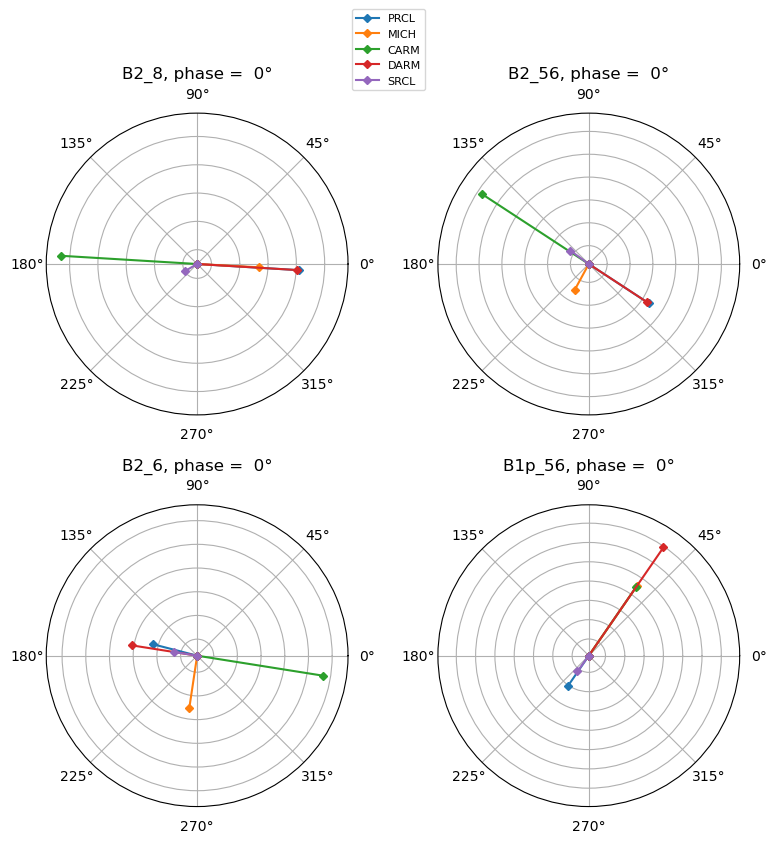

In [10]:
virgo.plot_sensing_matrix()

## Other examples can be found on this notebook (by Jonathan Perry):
**https://gitlab.com/ifosim/finesse/finesse-virgo/-/blob/main/examples/setup.ipynb**

In [11]:
# To have a list of all the methods included in the virgo class, do this: 
[func for func in dir(virgo) if callable(getattr(virgo, func)) and not func.startswith("__")]
#(A simpler way of doing this is to just do `dir(virgo)` but that also prints some additional junk)

['add_locks',
 'adjust_PRC_length',
 'adjust_SRC_length',
 'adjust_recycling_cavity_length',
 'apply_aperture',
 'apply_dc_offset',
 'deepcopy',
 'deg2m',
 'dof_from_lock',
 'dof_plot',
 'get_DARM',
 'get_QNLS',
 'get_dof_lock',
 'get_dof_tunings',
 'get_dofs',
 'get_dofs_by_component',
 'get_dofs_dc',
 'get_error_signals',
 'get_optical_gain',
 'get_phi_tunings',
 'get_powers',
 'get_sensing_matrix',
 'get_settings',
 'get_tuning',
 'get_tunings',
 'init_control_scheme',
 'make',
 'optimize_TL',
 'optimize_demodulation_phase',
 'optimize_lock_gains',
 'plot_DARM',
 'plot_QNLS',
 'plot_error_signals',
 'plot_powers',
 'plot_radar',
 'plot_sensing_matrix',
 'pretune',
 'print_dofs',
 'print_error_signals',
 'print_info',
 'print_lengths',
 'print_locks',
 'print_powers',
 'print_pretune_status',
 'print_sensing_matrix',
 'print_settings',
 'print_thermal_values',
 'print_tunings',
 'sensing_W_to_m',
 'set_dof_tunings',
 'set_phi_tunings',
 'set_thermal_state',
 'set_tunings',
 'update_l